In [1]:
from nltk.stem import PorterStemmer, WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


For article number: 1
Original Sentiment Polarity: 0.07480005684551139
Stemmed Sentiment Polarity: 0.04175905395417589
Lemmatized Sentiment Polarity: 0.06107319952774498
For article number: 2
Original Sentiment Polarity: 0.19167240390131957
Stemmed Sentiment Polarity: 0.1479261904761905
Lemmatized Sentiment Polarity: 0.17604793233082705
For article number: 3
Original Sentiment Polarity: 0.12330246913580246
Stemmed Sentiment Polarity: 0.02685830429732869
Lemmatized Sentiment Polarity: 0.04543245869776482
For article number: 4
Original Sentiment Polarity: 0.08647425340360121
Stemmed Sentiment Polarity: 0.006016835016835014
Lemmatized Sentiment Polarity: 0.05820444706808343
For article number: 5
Original Sentiment Polarity: 0.07808794466403163
Stemmed Sentiment Polarity: 0.09083110516934048
Lemmatized Sentiment Polarity: 0.07492252066115704
For article number: 6
Original Sentiment Polarity: 0.10064658683610299
Stemmed Sentiment Polarity: -0.02313188705234159
Lemmatized Sentiment Polarity:

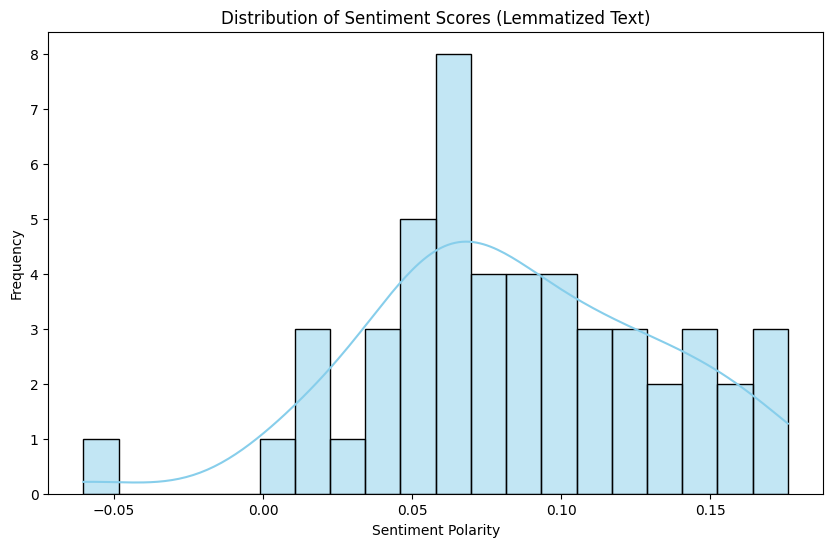

In [4]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import string
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize a Porter stemmer and WordNet lemmatizer
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'}
url = 'https://www.morningstar.co.uk/uk/collection/100065/esg.aspx'
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

count = 1

sentiment_scores = []

article_title = soup.find_all('td', {'headers': 'archive_title'})

for item in article_title:
    link = item.find('a')['href']
    r = requests.get(link)
    soupy = BeautifulSoup(r.content, 'html.parser')
    article_content = soupy.find('div', {'class': 'mainContent fontsize12'})
    article_text = article_content.get_text()

    blob = TextBlob(article_text)

    # Tokenization
    words = word_tokenize(article_text.lower())

    # Remove stop words and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words and word not in string.punctuation]

    # Stemming
    stemmed_words = [porter_stemmer.stem(word) for word in filtered_words]

    # Lemmatization
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word) for word in filtered_words]

    # Join the words back to form a new text
    stemmed_text = " ".join(stemmed_words)
    lemmatized_text = " ".join(lemmatized_words)

    # Create TextBlob objects from the preprocessed text
    blob_stemmed = TextBlob(stemmed_text)
    blob_lemmatized = TextBlob(lemmatized_text)

    # Get the sentiment polarity for both stemmed and lemmatized text
    sentiment_polarity_stemmed = blob_stemmed.sentiment.polarity
    sentiment_polarity_lemmatized = blob_lemmatized.sentiment.polarity

    sentiment_scores.append(sentiment_polarity_lemmatized)

    # Print sentiment results
    print(f"For article number: {count}")
    print(f"Original Sentiment Polarity: {blob.sentiment.polarity}")
    print(f"Stemmed Sentiment Polarity: {sentiment_polarity_stemmed}")
    print(f"Lemmatized Sentiment Polarity: {sentiment_polarity_lemmatized}")

    count += 1

# Additional Insights
# Distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(sentiment_scores, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores (Lemmatized Text)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()
